# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image 

from sklearn.datasets import fetch_openml  # 오픈 소스로 공개된 ML 데이터 셋을 다운로드
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Matplotlib.image 모듈

In [3]:
img = image.imread('spring.jpg')

`matplotlib.image.imread()`:

* 이미지 파일 읽어서 numpy.ndarray를 생성
* 흑백 이미지: (height, width) shape의 2차원 배열
* RGB 이미지: (height, width, 3) shape의 3차원 배열
* RGBA 이미지: (height, width, 4) shape의 3차원 배열 

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape  #> (height, width, )

(1200, 2000, 3)

In [ ]:
img[:, :, 0]
# 이미지의 Red 값: 0 ~ 255  (8 bits)

`matplotlib.pyplot.imshow()`: 

* numpy.ndarray로 변환된 이미지(배열)를 시각화 

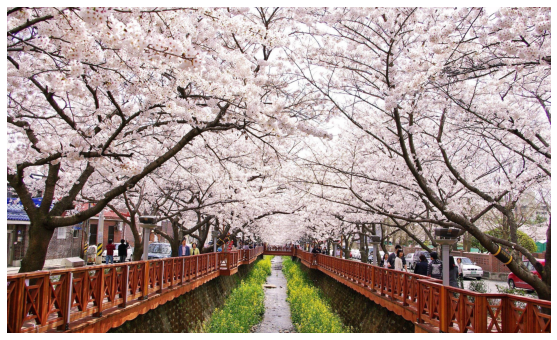

In [6]:
plt.figure(figsize=(10, 6))  # figsize=(width, height)
plt.imshow(img)
plt.axis('off')
plt.show()

`matplotlib.pyplot.imsave(file_name, array)`

`matplotlib.image.imsave(file_name, array)`

* 배열 array를 이미지 파일 file_name로 저장 

In [7]:
plt.imsave('spring_copy.jpg', img)

In [8]:
image.imsave('spring_copy2.jpg', img)

`numpy.save(file_name, array)`
> numpy 배열 array를 파일 file_name으로 저장 

`numpy.load(file_name)`
> 파일 file_name을 읽어서 numpy 배열을 생성

In [9]:
np.save('spring.npy', img)  # ndarray를 파일에 저장

In [10]:
arr = np.load('spring.npy') # 파일에 저장된 ndarray를 읽어서 리턴
arr.shape

(1200, 2000, 3)

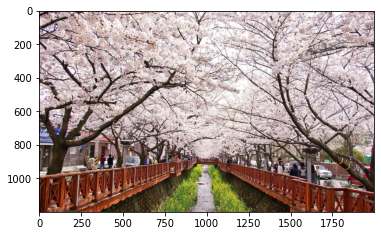

In [11]:
plt.imshow(arr)
plt.show()

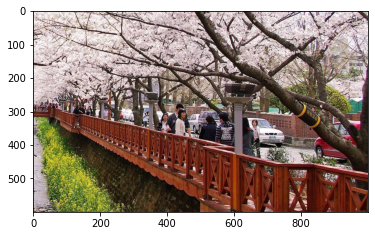

In [12]:
img_crop = img[600:, 1000:, :]  # 이미지 일부 잘라내기 
plt.imshow(img_crop)
plt.show()

In [13]:
image.imsave('crop.jpg', img_crop) # 배열을 이미지 파일로 저장

In [14]:
np.save('crop.npy', img_crop)  # ndarray를 파일에 저장

In [15]:
red = img[:, :, 0]
red.shape

(1200, 2000)

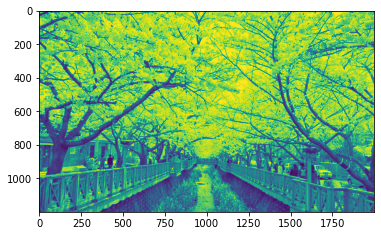

In [16]:
plt.imshow(red)
plt.show()

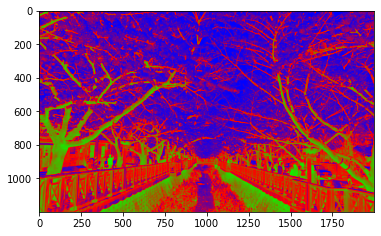

In [17]:
plt.imshow(red, cmap=plt.cm.brg_r)
plt.show()

# MNIST 데이터 셋

In [18]:
mnist = fetch_openml(name='mnist_784')

In [19]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [20]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [21]:
X, y = mnist['data'], mnist['target']

In [22]:
X.shape  # 28x28(=784) 크기의 숫자 손글씨 이미지 70,000개 데이터

(70000, 784)

In [23]:
y.shape  # 70,0000개 이미지의 클래스(0, 1, 2, ..., 9)

(70000,)

In [24]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

## 손글씨 이미지 시각화

In [25]:
image_0 = X[0].reshape((28, 28))
image_0.shape

(28, 28)

In [26]:
image_0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

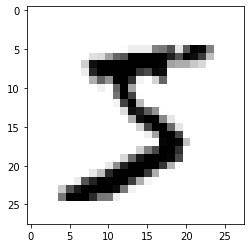

In [27]:
plt.imshow(image_0, cmap=plt.cm.binary)
# cmap='gray': 0(black) ~ 255(white)
# cmap='binary': 0(white) ~ 255(black)

plt.show()

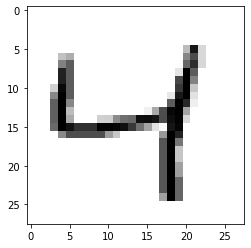

In [28]:
plt.imshow(X[2].reshape((28, 28)), cmap='binary')
plt.show()

## 100개 숫자 이미지 시각화 

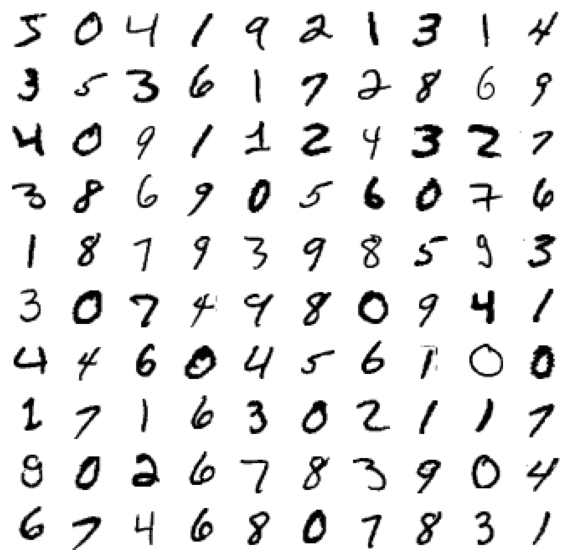

In [ ]:
# 100개 subplot 생성 
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10)) 

# row 10개 반복
for i in range(10): 
    # column 10 개 반복 
    for j in range(10): 
        # MNIST 1차원 배열을 (28, 28) 모양의 2차원 배열로 변환
        img_arr = X[i * 10 + j].reshape((28, 28))
        axes[i, j].imshow(img_arr, cmap=plt.cm.binary)
        axes[i, j].axis('off')

plt.show()

# Train/Test 분리

In [29]:
# 타겟: 문자열들의 배열 -> 숫자들의 배열 변화
y = y.astype(np.int8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [30]:
# 데이터가 random하게 섞여 있는 상태이기 때문에, 첫 6,000개를 훈련 셋, 뒷 10,000개를 테스트 셋으로
num_train = 60_000
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

In [31]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [32]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

# 모델 훈련

## LogisticRegression

In [ ]:
# 모델 생성
log_clf = LogisticRegression(random_state=42, n_jobs=-1)

In [ ]:
# 모델 훈련 
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# 훈련 셋 정확도 
log_clf.score(X_train, y_train)

0.9339166666666666

In [ ]:
log_clf.coef_.shape
# (n_classes, n_features)

(10, 784)

In [ ]:
deci_fn = log_clf.decision_function(X_train)
deci_fn.shape

(60000, 10)

In [ ]:
deci_fn[:5]

array([[  0.33094241,  -7.47436299,   1.6418886 ,   8.38208367,
         -6.77808983,   9.55670166,  -4.56166295,  -1.47937449,
          0.46911587,  -0.08724194],
       [ 15.37697738, -13.82117686,   0.97340526,   0.14274449,
         -5.04761827,   2.88914379,  -1.71825614,  -2.19036473,
          1.70842957,   1.68671552],
       [ -2.73549627,  -7.2227934 ,   3.88905965,   4.65682821,
          5.8511399 ,  -5.45850764,  -0.98745054,   1.13740233,
          0.0351889 ,   0.83462886],
       [ -4.60573477,   8.7365189 ,   4.27102073,   1.69755782,
         -2.34447642,  -2.60138536,  -3.70396209,  -4.050584  ,
          4.17039413,  -1.56934893],
       [ -6.81333674,  -1.91261821,  -6.39171838,  -2.86898832,
          6.03525279,  -0.56619059,  -4.57866477,   4.67182634,
          3.021273  ,   9.40316489]])

In [ ]:
pred_pr = log_clf.predict_proba(X_train)
pred_pr.shape

(60000, 10)

In [ ]:
pred_pr[:5]
# decision_function예서 계산된 함수를 soft max 함수에 넘겨서 이 수치가 나옴
# 여기서 제일 큰 숫자로 판별

array([[7.51911046e-05, 3.06454073e-08, 2.78935095e-04, 2.35902578e-01,
        6.14827083e-08, 7.63594512e-01, 5.64072535e-07, 1.23014364e-05,
        8.63325234e-05, 4.94938580e-05],
       [9.99993076e-01, 2.08641033e-13, 5.55399009e-07, 2.42021368e-07,
        1.34805561e-09, 3.77224396e-06, 3.76384221e-08, 2.34745488e-08,
        1.15830280e-06, 1.13342245e-06],
       [1.27505610e-04, 1.43456725e-06, 9.60588484e-02, 2.07002229e-01,
        6.83373287e-01, 8.37414511e-06, 7.32311590e-04, 6.13066777e-03,
        2.03621004e-03, 4.52913154e-03],
       [1.56936425e-06, 9.77666874e-01, 1.12421580e-02, 8.57450271e-04,
        1.50582942e-05, 1.16466666e-05, 3.86686182e-06, 2.73415209e-06,
        1.01659532e-02, 3.26895823e-05],
       [8.67227193e-08, 1.16543458e-05, 1.32202423e-07, 4.47859346e-06,
        3.29764894e-02, 4.47954588e-05, 8.10286482e-07, 8.43482032e-03,
        1.61901037e-03, 9.56907722e-01]])

In [ ]:
np.argmax(pred_pr, axis=1)
# 위 각 컬럼별 max 값 위치 반환. 첫번재 경우 5번째(5)가 가장 높은 것으로 반환

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
train_pred = log_clf.predict(X_train)
train_pred.shape

(60000,)

In [ ]:
train_pred[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

### 틀린 예측 분석

In [ ]:
y_train != train_pred  # 실제값과 예측값이 다른 샘플들

array([False, False, False, ..., False, False, False])

In [ ]:
# 예측이 틀린 훈련 셋의 샘플들
X_wrong = X_train[y_train != train_pred]
X_wrong.shape

(3965, 784)

In [ ]:
# 예특이 틀린 훈련 타겟들
wrong_targets = y_train[y_train != train_pred]
wrong_targets.shape

(3965,)

In [ ]:
wrong_targets[:10]

array([7, 9, 9, 5, 1, 7, 2, 3, 1, 3], dtype=int8)

In [ ]:
wrong_pred = train_pred[y_train != train_pred]
wrong_pred.shape

(3965,)

In [ ]:
wrong_pred[:10]  # 예측 틀린 샘플의 예측값

array([1, 5, 8, 3, 3, 9, 6, 2, 8, 5], dtype=int8)

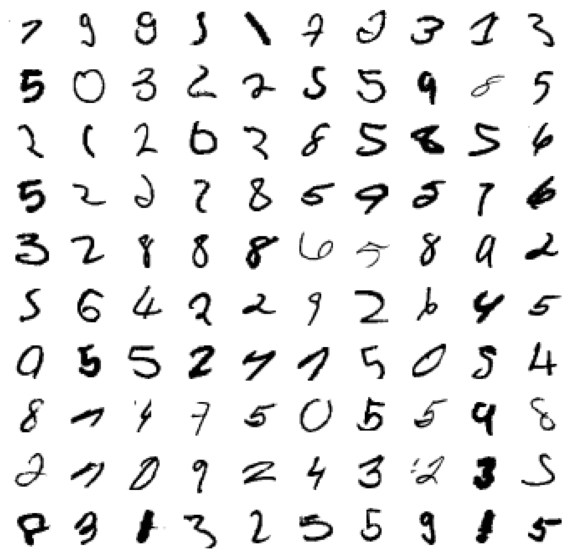

In [ ]:
# 예측이 틀린 훈련 샘플 3,965개 중에서 100개를 시각화
pig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        img_arr = X_wrong[i*10 + j].reshape((28, 28))
        axes[i, j].imshow(img_arr, cmap=plt.cm.binary)
        axes[i, j].axis('off')

plt.show()

### Confusion matrix

In [ ]:
conf_mat = confusion_matrix(y_train, train_pred)

In [ ]:
conf_mat

array([[5764,    0,   15,    9,   14,   36,   33,   10,   38,    4],
       [   1, 6584,   32,   19,    6,   20,    3,   10,   55,   12],
       [  28,   47, 5445,   89,   61,   20,   56,   51,  140,   21],
       [  17,   23,  118, 5582,    6,  162,   14,   50,  119,   40],
       [  13,   22,   23,    9, 5491,    8,   48,   15,   42,  171],
       [  57,   18,   40,  161,   48, 4793,   82,   15,  160,   47],
       [  34,    9,   40,    0,   35,   58, 5713,    4,   21,    4],
       [  11,   20,   58,   28,   42,    8,    4, 5896,   20,  178],
       [  27,   93,   55,  122,   19,  136,   36,   18, 5293,   52],
       [  21,   22,   14,   70,  129,   33,    3,  138,   45, 5474]])

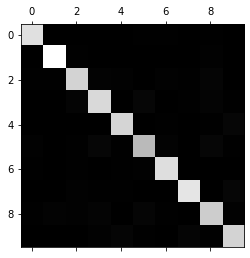

In [ ]:
# confusion matrix 시각화 
plt.matshow(conf_mat, cmap=plt.cm.gray)  # cmap='gray': 0(black) ~ 255(white)
plt.show()

confusion matrix 시각화 문제점:
* 정답률이 높기 때문에, 대각선 이외의 셀들은 상대적으로 숫자가 너무 작기 때문에, 거의 검은색으로만 보임 
* 훈련 셋의 샘플들이 클래스마다 고르게 분포하지 않음 
    * 각 클래스에서 틀린 비율을 고려해야 하지 않을까


In [ ]:
conf_mat_sum = np.sum(conf_mat, axis=1, keepdims=True)
conf_mat_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [ ]:
conf_mat_norm = conf_mat / conf_mat_sum
conf_mat_norm

array([[9.73155496e-01, 0.00000000e+00, 2.53250042e-03, 1.51950025e-03,
        2.36366706e-03, 6.07800101e-03, 5.57150093e-03, 1.68833361e-03,
        6.41566774e-03, 6.75333446e-04],
       [1.48323939e-04, 9.76564818e-01, 4.74636606e-03, 2.81815485e-03,
        8.89943637e-04, 2.96647879e-03, 4.44971818e-04, 1.48323939e-03,
        8.15781667e-03, 1.77988727e-03],
       [4.69956361e-03, 7.88855321e-03, 9.13897281e-01, 1.49378986e-02,
        1.02383350e-02, 3.35683115e-03, 9.39912722e-03, 8.55991944e-03,
        2.34978181e-02, 3.52467271e-03],
       [2.77279400e-03, 3.75142717e-03, 1.92464525e-02, 9.10455064e-01,
        9.78633176e-04, 2.64230957e-02, 2.28347741e-03, 8.15527646e-03,
        1.94095580e-02, 6.52422117e-03],
       [2.22526532e-03, 3.76583362e-03, 3.93700787e-03, 1.54056830e-03,
        9.39917836e-01, 1.36939404e-03, 8.21636426e-03, 2.56761383e-03,
        7.18931873e-03, 2.92707977e-02],
       [1.05146652e-02, 3.32042059e-03, 7.37871241e-03, 2.96993175e-02,
   

<function matplotlib.pyplot.show>

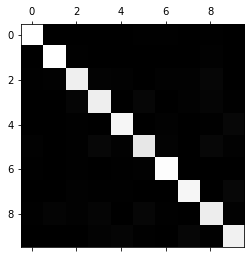

In [ ]:
plt.matshow(conf_mat_norm, cmap=plt.cm.gray)
plt.show

In [ ]:
# 관심사: 어떤 곳이 많이 틀렸나 --> 대각선 관심 없음 --> 대가선의 숫자를 모두 0으로
np.fill_diagonal(conf_mat_norm, 0)
conf_mat_norm

array([[0.        , 0.        , 0.0025325 , 0.0015195 , 0.00236367,
        0.006078  , 0.0055715 , 0.00168833, 0.00641567, 0.00067533],
       [0.00014832, 0.        , 0.00474637, 0.00281815, 0.00088994,
        0.00296648, 0.00044497, 0.00148324, 0.00815782, 0.00177989],
       [0.00469956, 0.00788855, 0.        , 0.0149379 , 0.01023834,
        0.00335683, 0.00939913, 0.00855992, 0.02349782, 0.00352467],
       [0.00277279, 0.00375143, 0.01924645, 0.        , 0.00097863,
        0.0264231 , 0.00228348, 0.00815528, 0.01940956, 0.00652422],
       [0.00222527, 0.00376583, 0.00393701, 0.00154057, 0.        ,
        0.00136939, 0.00821636, 0.00256761, 0.00718932, 0.0292708 ],
       [0.01051467, 0.00332042, 0.00737871, 0.02969932, 0.00885445,
        0.        , 0.01512636, 0.00276702, 0.02951485, 0.00866999],
       [0.00574518, 0.00152078, 0.00675904, 0.        , 0.00591416,
        0.00980061, 0.        , 0.0006759 , 0.0035485 , 0.0006759 ],
       [0.00175579, 0.00319234, 0.0092577

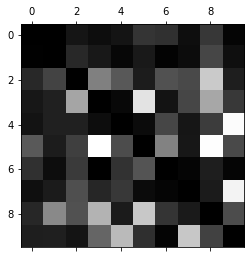

In [ ]:
plt.matshow(conf_mat_norm, cmap=plt.cm.gray)
plt.show()

상대적으로 밝은 부분: 틀린 비율이 높은 샘플
* 4(실제) -> 9(예측) 
* 5 -> 3, 5 -> 8
* 7 -> 9 

### LogisticRegression 튜닝

In [ ]:
# 훈련 셋의 평가 점수(정확도)
log_clf.score(X_train, y_train)

0.9339166666666666

In [ ]:
# 일반화 성능 예측(테스트 셋의 정확도 예측) - 교차 검증
cv = cross_validate(estimator=log_clf, X=X_train, y=y_train, n_jobs=-1, return_train_score=True)

In [ ]:
np.mean(cv['train_score'])

0.9356541666666667

In [ ]:
np.mean(cv['test_score'])

0.9180333333333334

In [ ]:
# 하이퍼 파라미터 튜닝 - GridSearchCV, RAndomizedSearchCV 
params = {
    'penalty': ['l1', 'l2'], # 규제 종류
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] # 규제 크기 
}
# 2 x 7 하이퍼파라미터 조합 

In [ ]:
grid_cv = GridSearchCV(estimator=log_clf, param_grid=params,
                       n_jobs=-1, return_train_score=True)

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
grid_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
grid_cv.best_score_

0.91845

In [ ]:
grid_cv.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## Voting Ensemble

In [ ]:
log_clf = LogisticRegression(random_state=42)
sgd_clf = SGDClassifier(loss='log')
svm_clf = SVC(probability=True, random_state=42)
forest_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

In [ ]:
vote_clf = VotingClassifier(estimators=[('log', log_clf),
                                        ('svg', sgd_clf),
                                        ('svm', svm_clf),
                                        ('forest', forest_clf),
                                        ('knn', knn_clf)],
                            voting='soft',
                            n_jobs=-1)                                        

In [ ]:
vote_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svg',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stoppin...
                                                     min_

In [ ]:
vote_clf.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:313: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.9234

## SGDClassifier

## KNeighborsClassifier

In [33]:
# weights, n_neighbors 파라미터 조합을 GridSearchCV로 실험해 보세요
knn_clf = KNeighborsClassifier()

In [34]:
params = {
    'weights': ['uniform', 'distance'], 
    'n_neighbors': [3, 5, 10, 30, 50] 
}

In [35]:
grid_cv = GridSearchCV(estimator=knn_clf, param_grid=params,
                       n_jobs=-1, return_train_score=True)

In [ ]:
grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
grid_cv.best_score_

0.91845

In [ ]:
grid_cv.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## SVC

## RandomForest